# Loading Data 

In [279]:
import numpy as np 
import pandas as pd

df = pd.read_csv('project_010/train.csv') 

# Data Exploration 

In [280]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [281]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [282]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Understanding Features
---

### Feature Considerations 
`PassengerId` :Represents the id of the passanger __(should be removed)__

`Name ` : __(should be removed)__

`Ticket ` : __(consider removal)__

`Cabin` :__(Contains to many NaN values, Considering droping)__

`Fare `: __(consider removal, as a hypothesis : Pclass is enough that should be tested)__

### Categorical Features 
___

## `Pclass`
represents the socio-economic status 
        
    - 1 : upper 
    - 2 : middle 
    - 3 : Lower 
    
__Hot Encoding should be considered__

In [284]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## `Sex`
__Hot Encoding should be considered__

In [285]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## `Embarked` 

Port of Embarkation

__Hot Encoding should be considered__

In [286]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Numerical Features 
___

## `Age `
**Contains missing values**, that could be imputed 

In [287]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

## `Sibsp and Parch `
__Sibsp__ : # of siblings / spouses aboard the Titanic
__Parch__ : # of parents / children aboard the Titanic


Idea for feature engeneering : 
Categorical values for married, has kids, has siblings  

In [288]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [289]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Target value : `Survived `
----
Represents the target value for our model 

    - 0 : did not survive 
    - 1 : survived 
    
__We note that the number of non-survivers is bigger than the number of survivers, this should be taken care of when creating Train/test splits and when using Cross validation__

In [290]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Deleting Columns

In [291]:
columns_drop = ['PassengerId','Name', 'Ticket', 'Cabin']
df = df.drop(columns_drop, axis='columns')

In [292]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


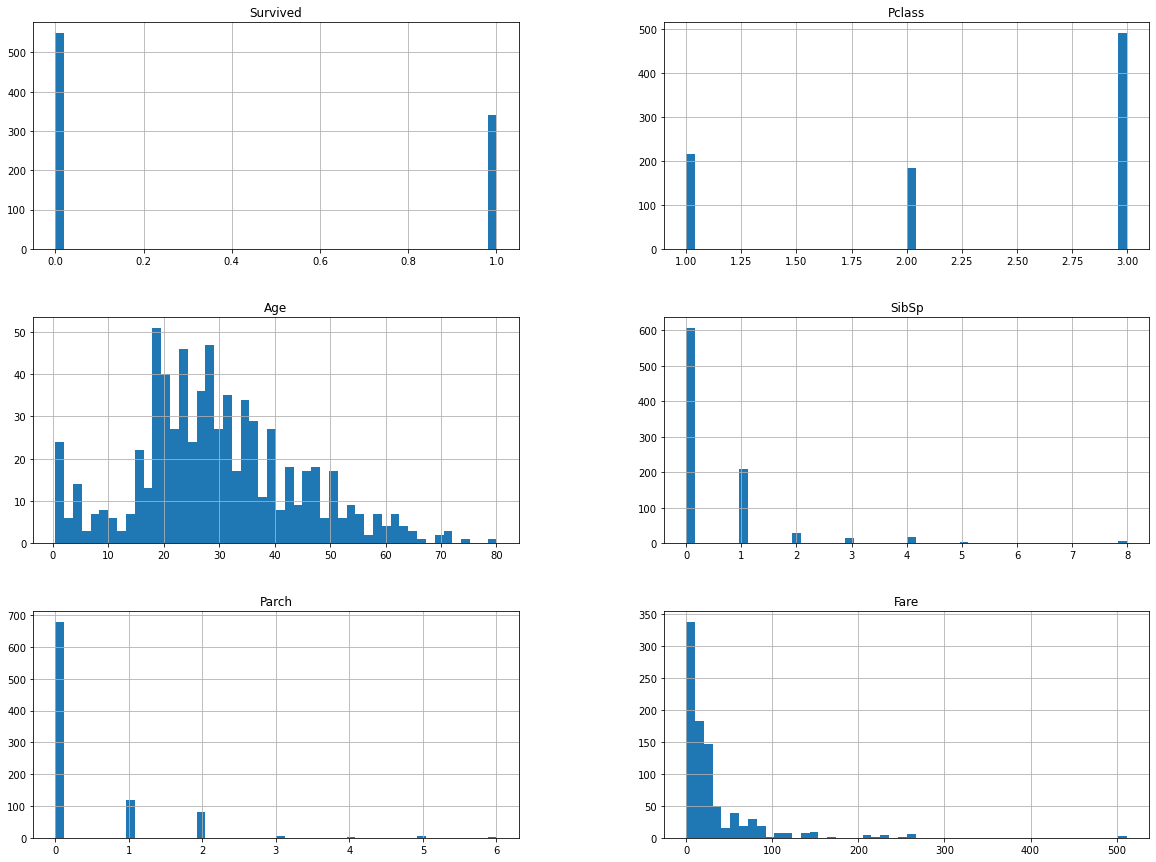

In [293]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Looking for duplicates, unique values and outliers  
### Unique numeric values 

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [295]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols].nunique()

Age       88
Fare     248
SibSp      7
Parch      7
dtype: int64

### Duplicates 

In [296]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])
print(df.shape)

True
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
47          1       3  female   NaN      0      0   7.7500        Q
76          0       3    male   NaN      0      0   7.8958        S
77          0       3    male   NaN      0      0   8.0500        S
87          0       3    male   NaN      0      0   8.0500        S
95          0       3    male   NaN      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
870         0       3    male  26.0      0      0   7.8958        S
877         0       3    male  19.0      0      0   7.8958        S
878         0       3    male   NaN      0      0   7.8958        S
884         0       3    male  25.0      0      0   7.0500        S
886         0       2    male  27.0      0      0  13.0000        S

[111 rows x 8 columns]
(891, 8)


In [297]:
df.drop_duplicates(inplace=True)
print(df.shape)

(780, 8)


## Rechecking missing values and Dropping them  
`Age`: will try in a pipeline different types of imputations 

`Embarked` : two missing values, consider either imputation or dropping the rows

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    object 
 3   Age       676 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.8+ KB


In [299]:
df.dropna(subset = ["Embarked"], inplace=True)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  778 non-null    int64  
 1   Pclass    778 non-null    int64  
 2   Sex       778 non-null    object 
 3   Age       674 non-null    float64
 4   SibSp     778 non-null    int64  
 5   Parch     778 non-null    int64  
 6   Fare      778 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.7+ KB


## Filling Categorical Values with their Meaning 


In [301]:
df['Pclass'] = df['Pclass'].replace({3:'lower', 2:'middle', 1:'upper'})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,lower,male,22.0,1,0,7.2500,S
1,1,upper,female,38.0,1,0,71.2833,C
2,1,lower,female,26.0,0,0,7.9250,S
3,1,upper,female,35.0,1,0,53.1000,S
4,0,lower,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,lower,female,39.0,0,5,29.1250,Q
887,1,upper,female,19.0,0,0,30.0000,S
888,0,lower,female,NaN,1,2,23.4500,S
889,1,upper,male,26.0,0,0,30.0000,C


In [302]:
from sklearn.model_selection import train_test_split


y = df['Survived']
X = df.drop('Survived', axis='columns')


# HotEncoding Categories 
## `Pclass` and `Embarked`

In [303]:
from sklearn.preprocessing import OneHotEncoder

list_encode = ['Pclass', 'Embarked','Sex']
for encode in list_encode:
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(X[[encode]])

    X[ohe.categories_[0]] = transformed.toarray()


X = X.drop(list_encode, axis=1)

In [304]:
X

,Age,SibSp,Parch,Fare,lower,middle,upper,C,Q,S,female,male
0,22.0,1,0,7.2500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,38.0,1,0,71.2833,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,35.0,0,0,8.0500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
887,19.0,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
888,NaN,1,2,23.4500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
889,26.0,0,0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Exploring Models 

In [306]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



#('cat_pip', categorical_pipeline, ['ocean_proximity'])
final_pipeline = ColumnTransformer([
    ('imputer', SimpleImputer(), ['Age']),
    ('st_scaler',StandardScaler(),['Fare']),
    ('min_max_scaler',MinMaxScaler(),['Fare'])
    ])



full_pipeline_with_predictor = Pipeline([
        ("data_prep",final_pipeline),
        ("model", LogisticRegression()),
        
    ])

full_pipeline_with_predictor.fit(X_train, y_train)

full_pipeline_with_predictor.get_params()

{'memory': None,
 'steps': [('data_prep',
   ColumnTransformer(transformers=[('imputer', SimpleImputer(), ['Age']),
                                   ('st_scaler', StandardScaler(), ['Fare']),
                                   ('min_max_scaler', MinMaxScaler(), ['Fare'])])),
  ('model', LogisticRegression())],
 'verbose': False,
 'data_prep': ColumnTransformer(transformers=[('imputer', SimpleImputer(), ['Age']),
                                 ('st_scaler', StandardScaler(), ['Fare']),
                                 ('min_max_scaler', MinMaxScaler(), ['Fare'])]),
 'model': LogisticRegression(),
 'data_prep__n_jobs': None,
 'data_prep__remainder': 'drop',
 'data_prep__sparse_threshold': 0.3,
 'data_prep__transformer_weights': None,
 'data_prep__transformers': [('imputer', SimpleImputer(), ['Age']),
  ('st_scaler', StandardScaler(), ['Fare']),
  ('min_max_scaler', MinMaxScaler(), ['Fare'])],
 'data_prep__verbose': False,
 'data_prep__imputer': SimpleImputer(),
 'data_prep__st_scaler

In [308]:


# 'data_prep__num_pip__std_scaler': ['passthrough', StandardScaler()],
# 'data_prep__num_pip__minmax_scaler': ['passthrough',MinMaxScaler()],

normal_params = {
    'data_prep__imputer__strategy' : ['mean', 'median', 'most_frequent', 'constant'] ,
    "model__C": [0.001,0.01,0.1,1,10,100,1000],
    'data_prep__st_scaler': ['passthrough', StandardScaler()],
    'data_prep__min_max_scaler' : ['passthrough',MinMaxScaler()]
}



# params = 

# grid_params = params

gs = GridSearchCV(full_pipeline_with_predictor, normal_params, scoring='accuracy', verbose=2)

gs.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', gs.best_params_)
print('Grid best score (accuracy): ', gs.best_score_)

#gs.best_estimator_.score(X_test,y_test)


Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.01; total time=   0.0s
[CV] END data_prep__impute

[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=100; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=passt

[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=1; total time=   0.0s
[CV] END data_prep__imputer__strategy=mean, data_prep_

[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=0.01; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=0.01; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, da

[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=10; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=100; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=100; total time=   0.0s
[CV] END data_prep__imputer__strategy=median, data_prep__min_max_scaler=Mi

[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.01; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.01; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_f

[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=100; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=100; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=100; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=100; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=1000; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=1000; total time=   0.0s
[CV] END data_

[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.01; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.01; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=most_frequent, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=0.1; total time=   0

[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=1000; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=1000; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=1000; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=1000; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=passthrough, model__C=1000; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=passthrough, data_prep__st_scaler=StandardScaler(), model__C=0.001; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_m

[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=0.1; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=1; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=1; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=passthrough, model__C=1; total time=   0.0s
[CV] END data_prep__imputer__strategy=constant, data_prep__min_m

[CV] END data_prep__imputer__strategy=constant, data_prep__min_max_scaler=MinMaxScaler(), data_prep__st_scaler=StandardScaler(), model__C=1000; total time=   0.0s
Grid best parameter (max. accuracy):  {'data_prep__imputer__strategy': 'median', 'data_prep__min_max_scaler': 'passthrough', 'data_prep__st_scaler': 'passthrough', 'model__C': 0.1}
Grid best score (accuracy):  0.665605658709107
